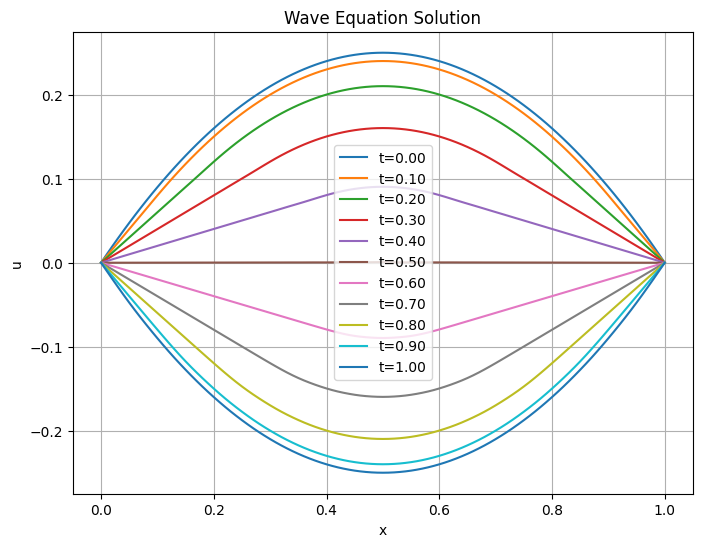

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
T = 1  # 時間の最終時刻
L = 1.0  # 空間の範囲
Nx = 100  # 空間の分割数
Nt = 1000  # 時間の分割数
dx = L / Nx  # 空間の刻み幅
dt = T / Nt  # 時間の刻み幅
c = 1.0  # 波の伝播速度

# 空間と時間のグリッドを作成
x = np.linspace(0, L, Nx+1)
t = np.linspace(0, T, Nt+1)

# 初期条件の設定
u = np.zeros((Nx+1, Nt+1))
u[:, 0] = x * (1 - x)  # 初期分布
u[:, 1] = u[:, 0] + dt * 0  # 初期速度分布

# 波動方程式の数値解法（2次精度の中心差分）
for n in range(1, Nt):
    for i in range(1, Nx):
        u[i, n+1] = 2 * (1 - c**2 * dt**2 / dx**2) * u[i, n] - u[i, n-1] + (c**2 * dt**2 / dx**2) * (u[i+1, n] + u[i-1, n])

# 結果のプロット
plt.figure(figsize=(8, 6))
for n in range(0, Nt+1, int(Nt/10)):
    plt.plot(x, u[:, n], label=f"t={t[n]:.2f}")
plt.xlabel('x')
plt.ylabel('u')
plt.title('Wave Equation Solution')
plt.legend()
plt.grid(True)
plt.show()
